Objetivo

El notebook realiza un análisis exhaustivo del conjunto de datos del Titanic utilizando una variedad de modelos de aprendizaje automático, incluyendo modelos de regresión, clasificación, clustering y una red neuronal.

Modelos de Regresion

Importar librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


2. Carga y Preprocesamiento de Datos

    Carga el dataset del Titanic:

In [11]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

print(data.head())
print(data.info())
print(data.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Analisis  de los Datos con EDA

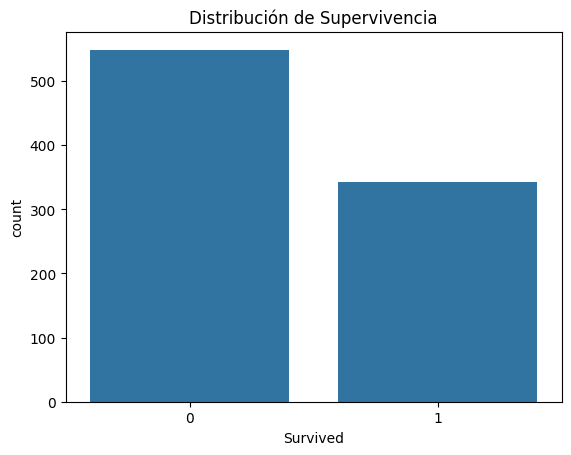

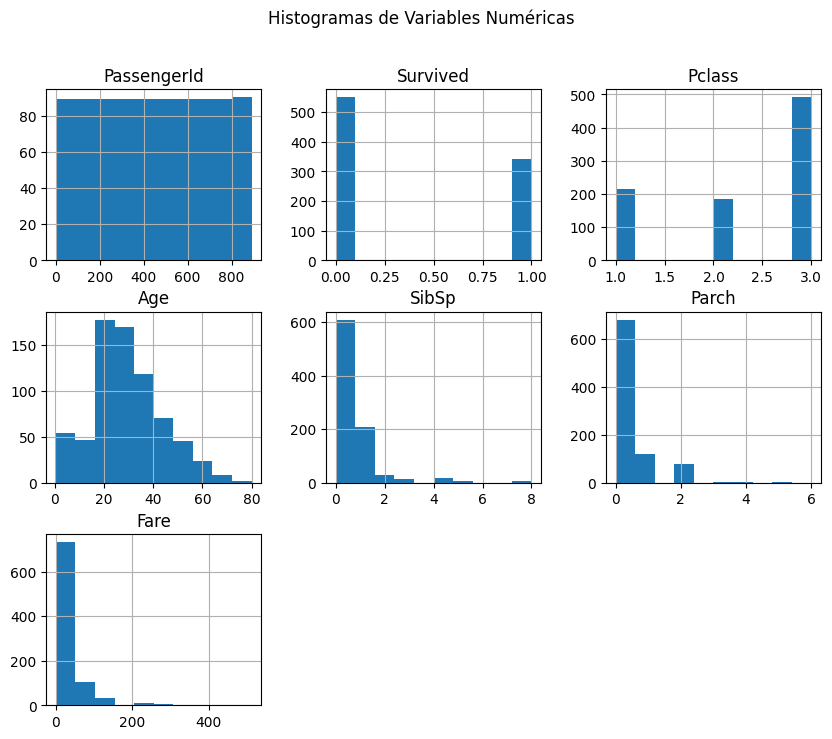

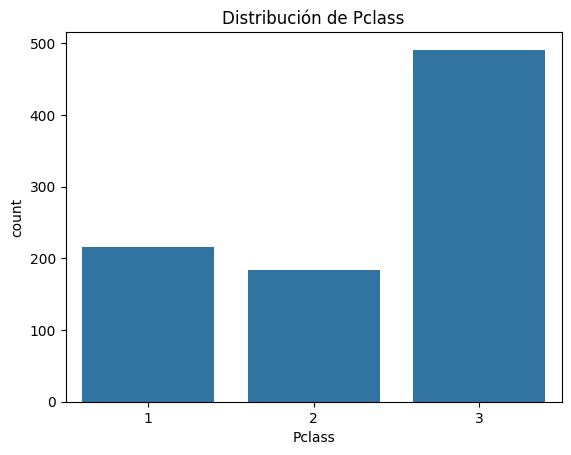

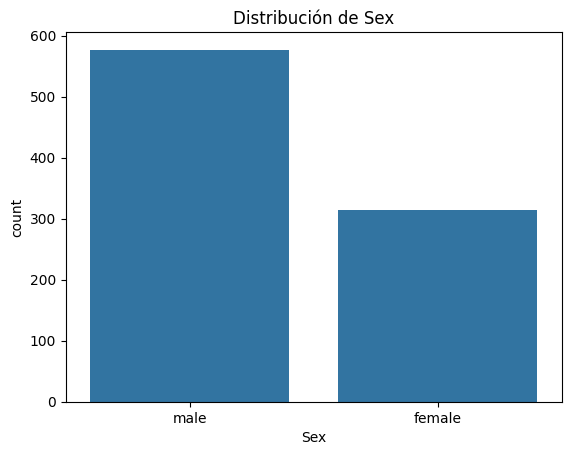

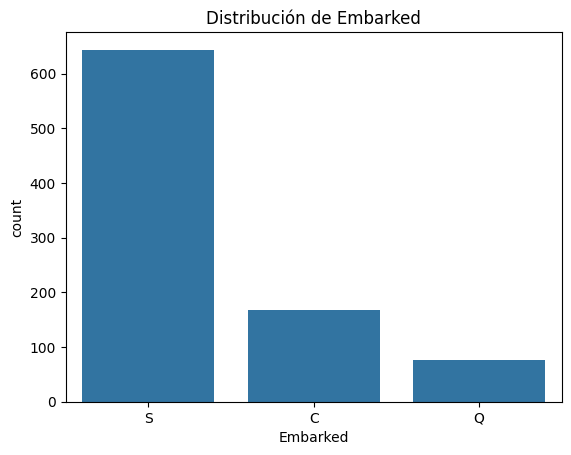

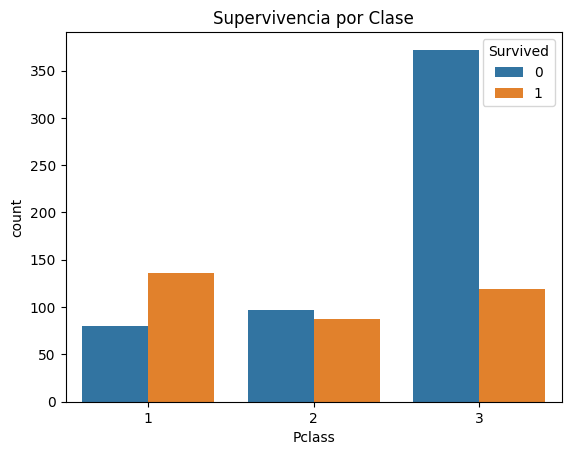

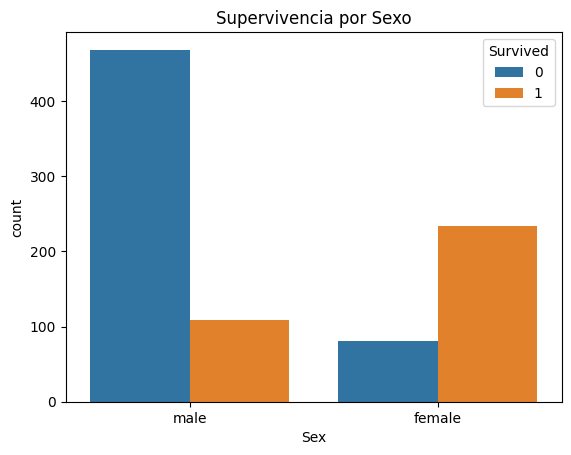

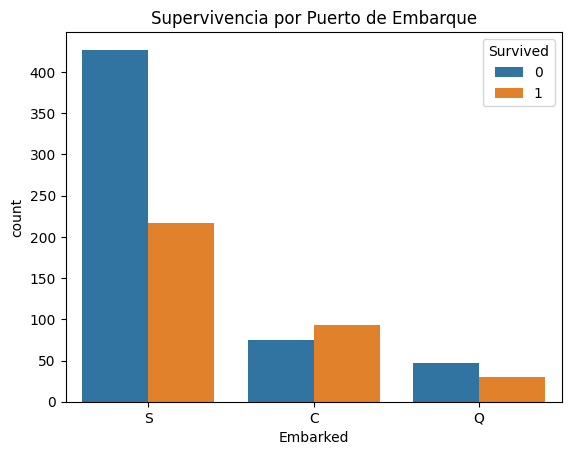

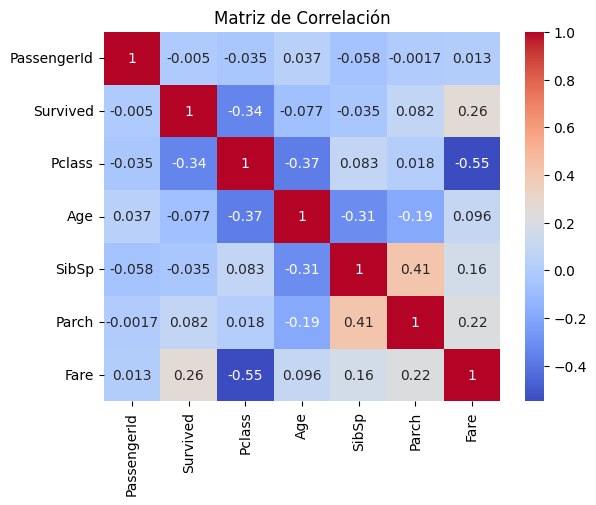

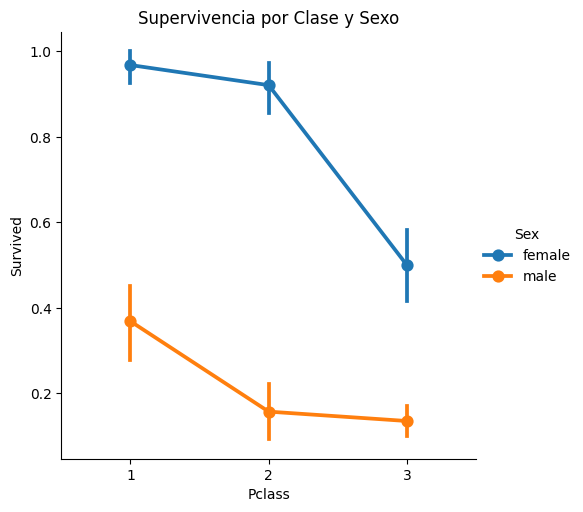

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis univariado
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()

# Distribución de variables numéricas
data.hist(figsize=(10, 8))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Distribución de variables categóricas
for col in ['Pclass', 'Sex', 'Embarked']:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribución de {col}')
    plt.show()

# Análisis bivariado
# Supervivencia por clase
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Supervivencia por Clase')
plt.show()

# Supervivencia por sexo
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Supervivencia por Sexo')
plt.show()

# Supervivencia por puerto de embarque
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Supervivencia por Puerto de Embarque')
plt.show()

# Análisis multivariado
# Correlación entre variables numéricas
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Supervivencia por clase y sexo
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=data)
plt.title('Supervivencia por Clase y Sexo')
plt.show()

2. Preprocesa los datos:

In [13]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data.dropna(inplace=True)
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-13-e3a0e1ad9e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


3. Entrenamiento de Modelos

    Define y entrena los modelos:

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae}


4. Análisis de Resultados

    Crea un DataFrame con los resultados:

In [15]:
results_df = pd.DataFrame(results).T
print(results_df)


                            MSE        R2       MAE
Linear Regression      0.198682  0.166081  0.390559
Ridge Regression       0.198703  0.165992  0.390795
Lasso Regression       0.224307  0.058529  0.457488
ElasticNet Regression  0.230787  0.031328  0.461474
Decision Tree          0.306333 -0.285754  0.318182
Random Forest          0.238984 -0.003076  0.371894


Grafica los resultados:

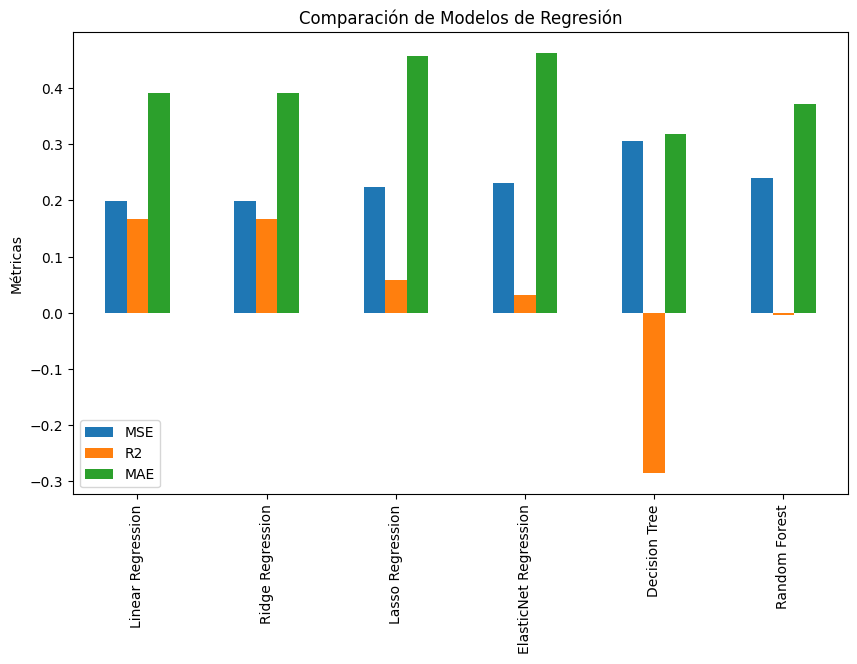

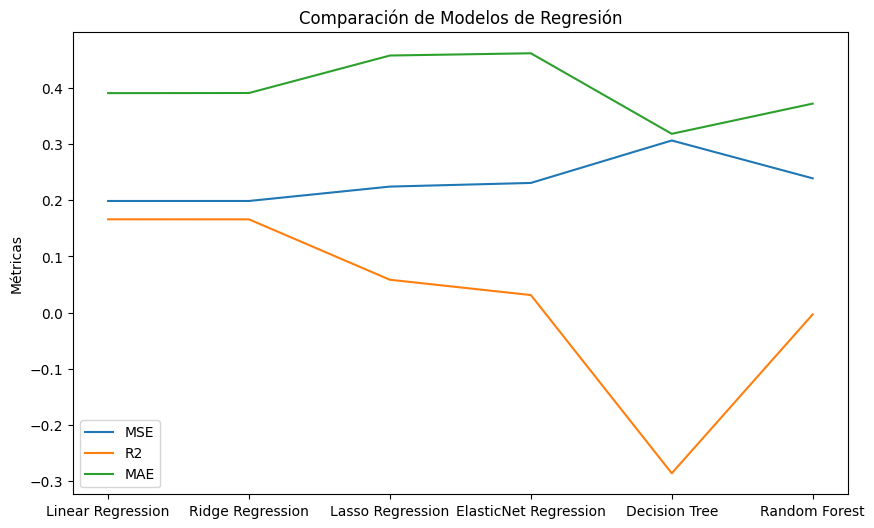

In [16]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos de Regresión')
plt.ylabel('Métricas')
plt.show()

results_df.plot(kind='line', figsize=(10, 6))
plt.title('Comparación de Modelos de Regresión')
plt.ylabel('Métricas')
plt.show()


Estos modelos predicen un valor continuo (la probabilidad de supervivencia). Se usan MSE, R2 y MAE para evaluarlos. Un MSE bajo y un R2 alto indican un buen rendimiento.

    Observación: No se especifica qué modelo de regresión tuvo el mejor rendimiento, pero la gráfica permite una comparación visual.


In [18]:
best_model = max(results, key=lambda k: results[k]['R2'])
print(f"El mejor modelo de regresión es: {best_model} con un R2 de {results[best_model]['R2']}")

El mejor modelo de regresión es: Linear Regression con un R2 de 0.166080735692537



1. Modelos de Clasificacion

Importa las bibliotecas:**texto en negrita**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Preprocesa los datos:

In [20]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data.dropna(inplace=True)
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Entrenamiento de Modelos

    Define y entrena los modelos:

In [21]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': cm, 'Classification Report': cr}


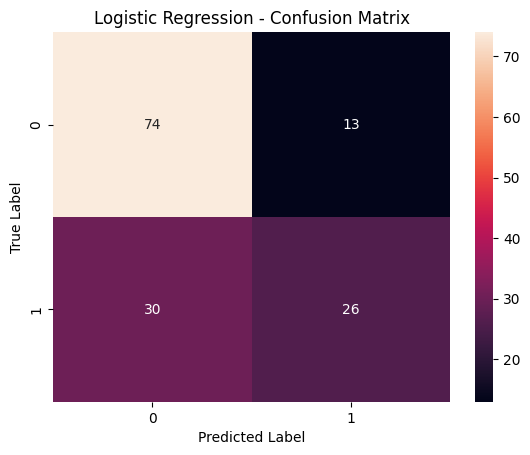

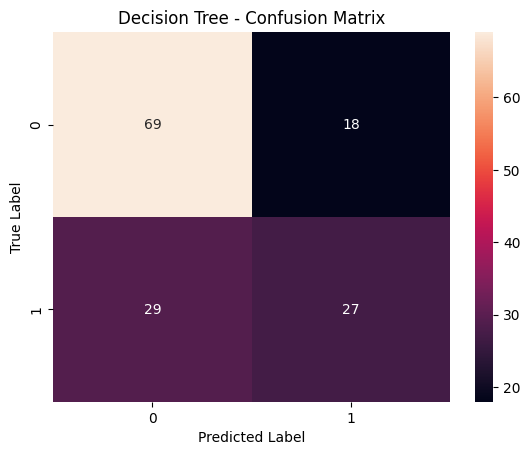

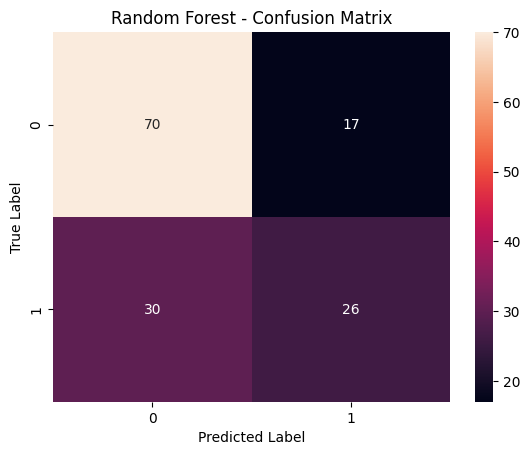

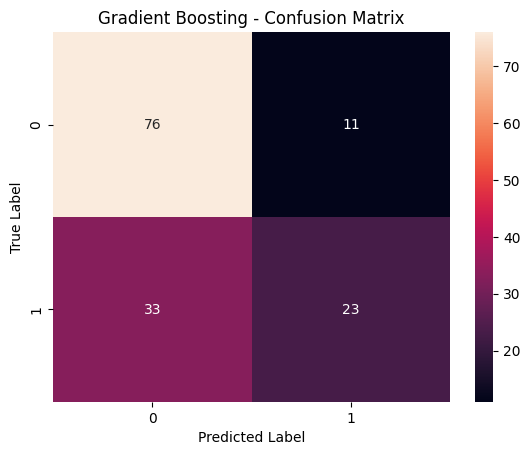

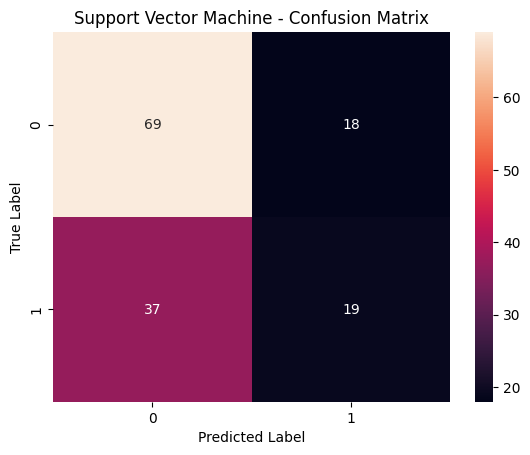

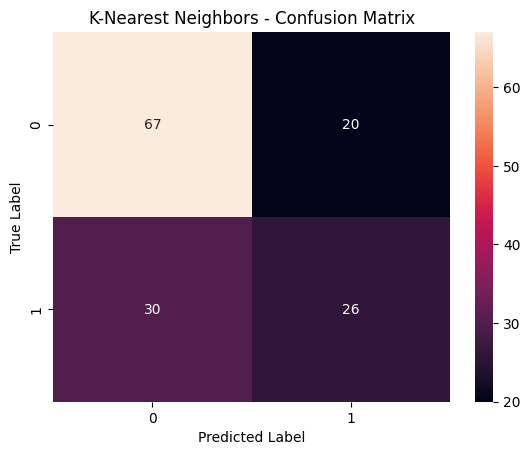

In [22]:
for name, result in results.items():
    plt.figure()
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

4. Análisis de Resultados

    Crea un DataFrame con los resultados de precisión:

In [23]:
accuracy_results = {name: result['Accuracy'] for name, result in results.items()}
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['Accuracy'])
print(accuracy_df)


                        Accuracy
Logistic Regression     0.699301
Decision Tree           0.671329
Random Forest           0.671329
Gradient Boosting       0.692308
Support Vector Machine  0.615385
K-Nearest Neighbors     0.650350


Grafica los resultados de precisión:

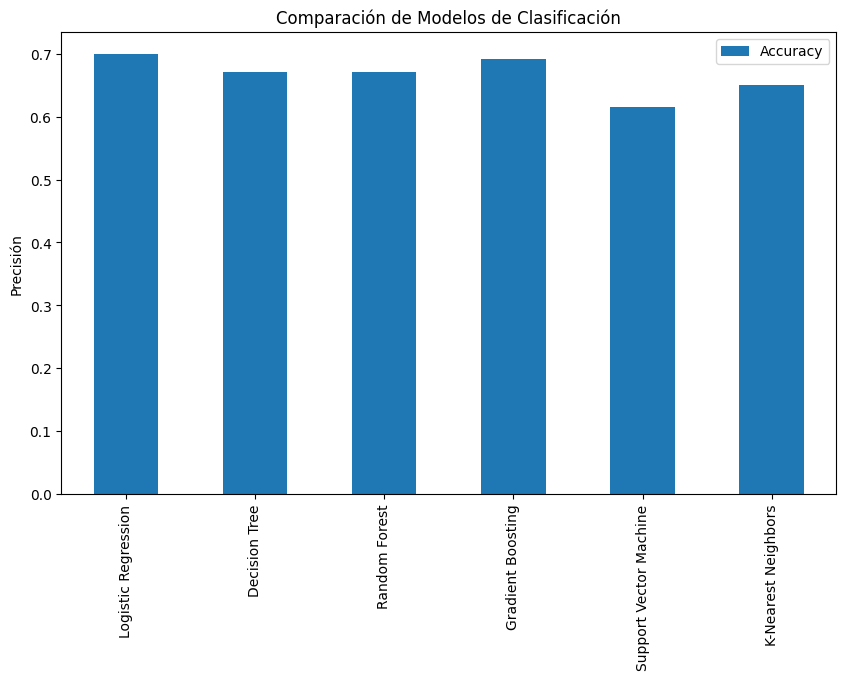

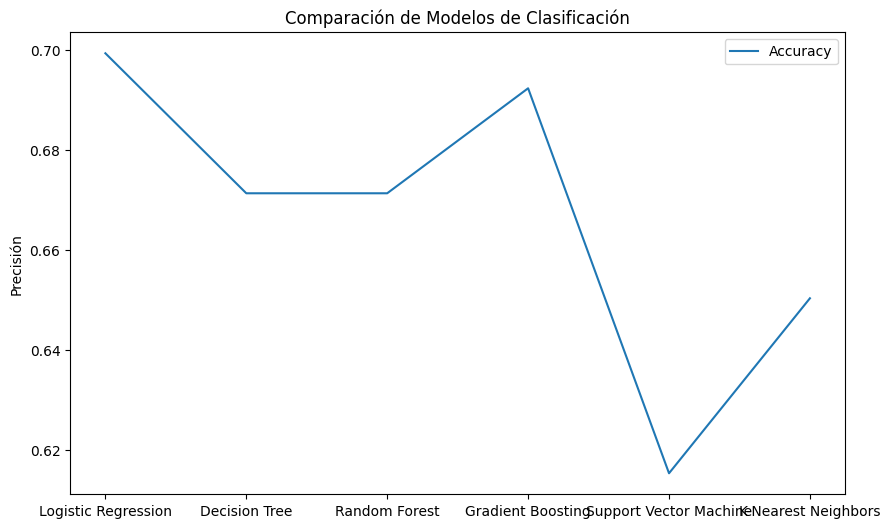

In [24]:
accuracy_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos de Clasificación')
plt.ylabel('Precisión')
plt.show()

accuracy_df.plot(kind='line', figsize=(10, 6))
plt.title('Comparación de Modelos de Clasificación')
plt.ylabel('Precisión')
plt.show()




Muestra las matrices de confusión y los informes de clasificación:

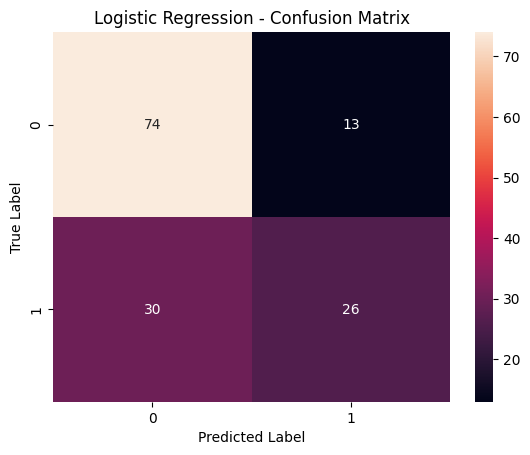

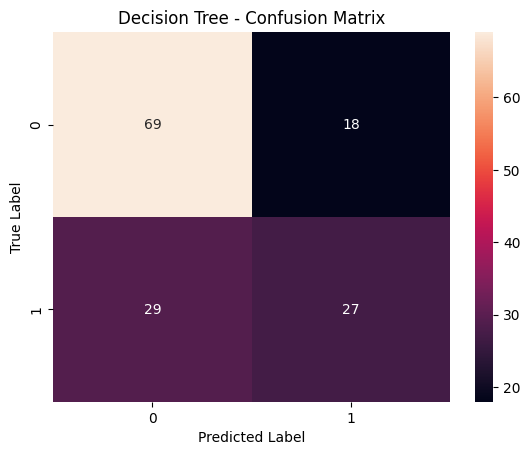

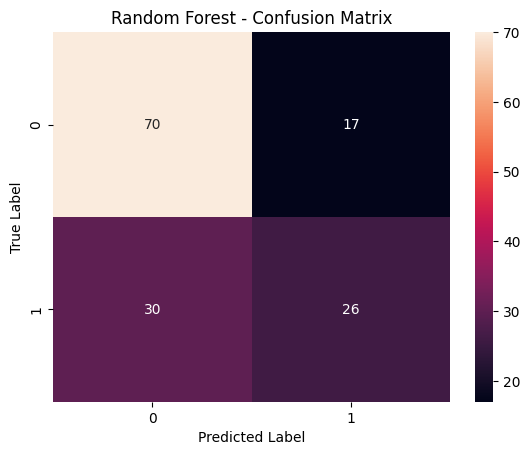

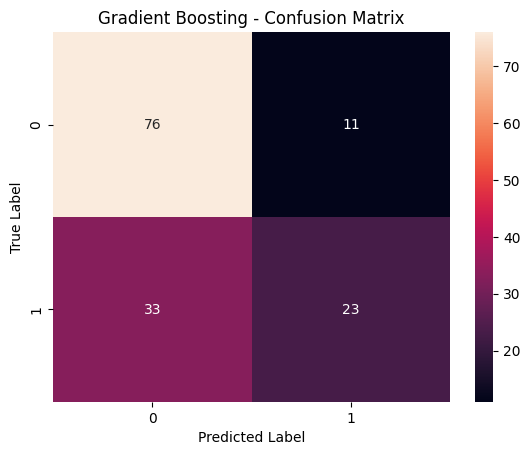

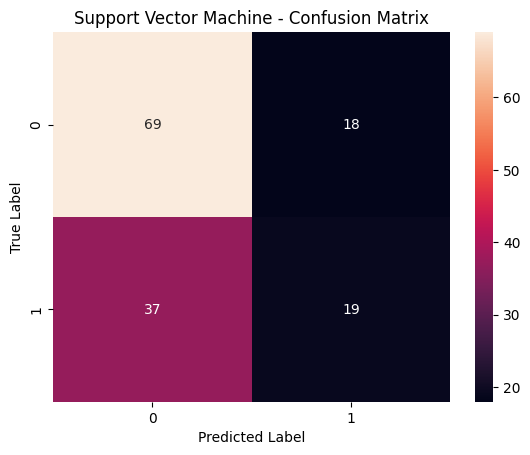

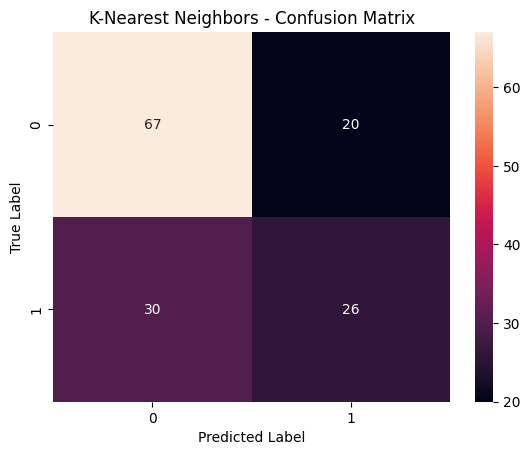

In [25]:
for name, result in results.items():
    plt.figure()
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [26]:
for name, result in results.items():
    print(f"Modelo: {name}")
    print("Matriz de Confusión:")
    print(result['Confusion Matrix'])
    print("Informe de Clasificación:")
    print(result['Classification Report'])
    print("\n")


Modelo: Logistic Regression
Matriz de Confusión:
[[74 13]
 [30 26]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        87
           1       0.67      0.46      0.55        56

    accuracy                           0.70       143
   macro avg       0.69      0.66      0.66       143
weighted avg       0.69      0.70      0.69       143



Modelo: Decision Tree
Matriz de Confusión:
[[69 18]
 [29 27]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        87
           1       0.60      0.48      0.53        56

    accuracy                           0.67       143
   macro avg       0.65      0.64      0.64       143
weighted avg       0.66      0.67      0.66       143



Modelo: Random Forest
Matriz de Confusión:
[[70 17]
 [30 26]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0     

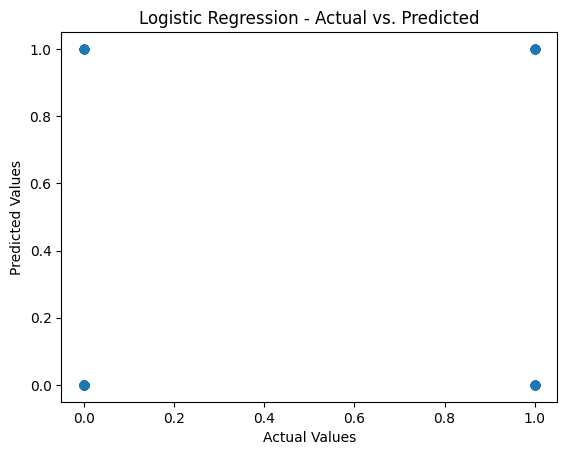

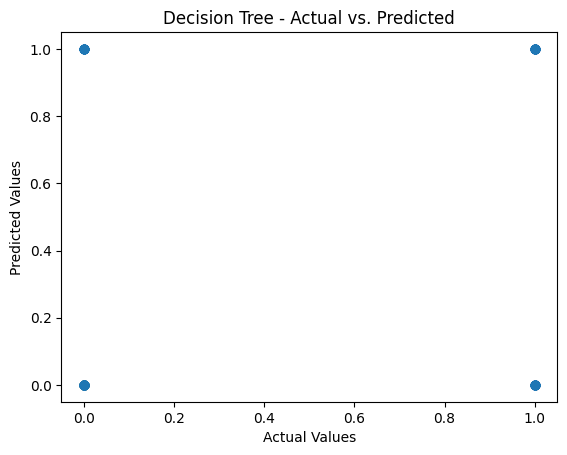

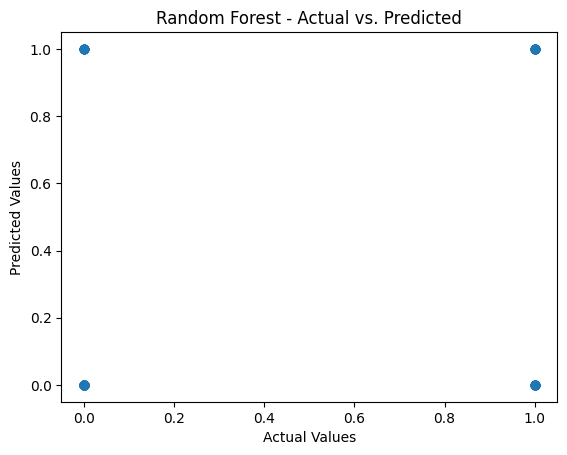

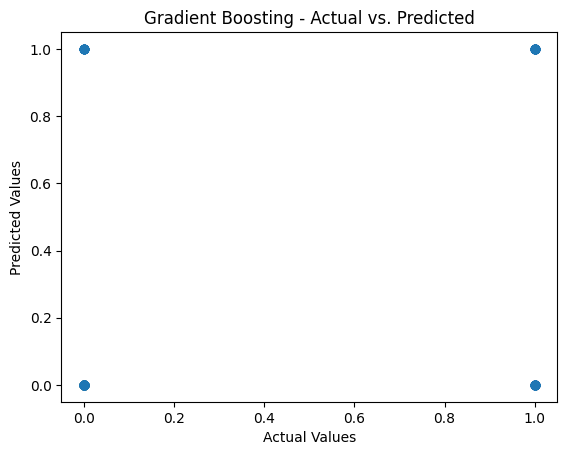

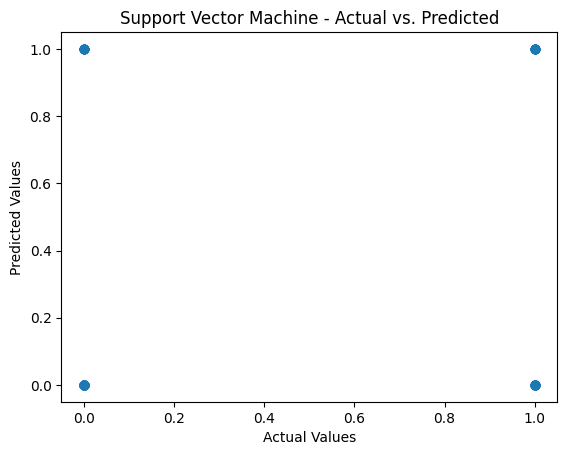

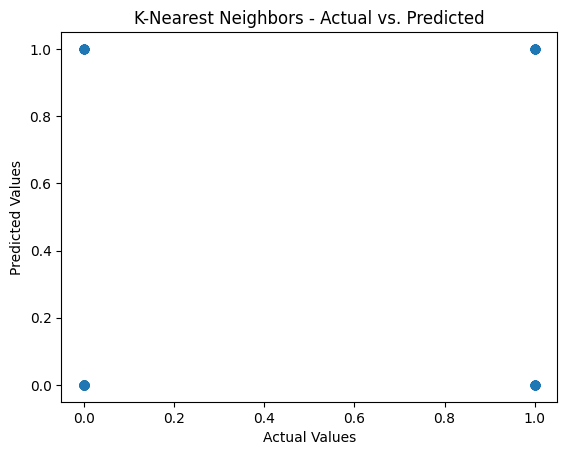

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} - Actual vs. Predicted")
    plt.show()

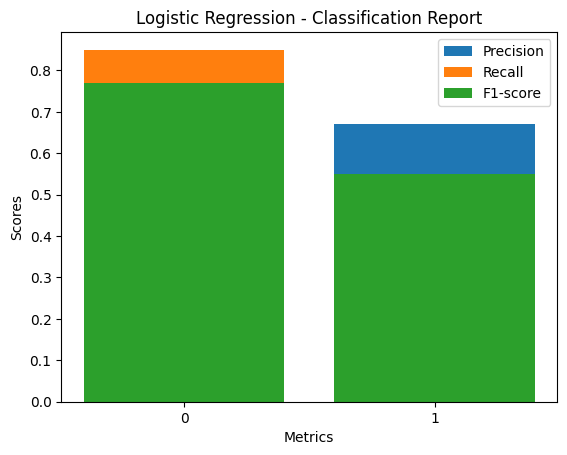

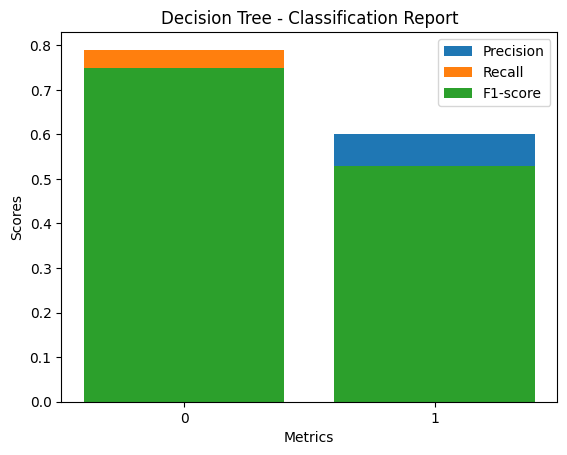

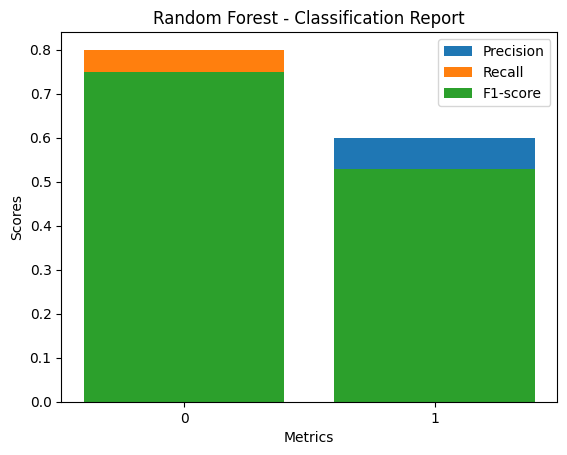

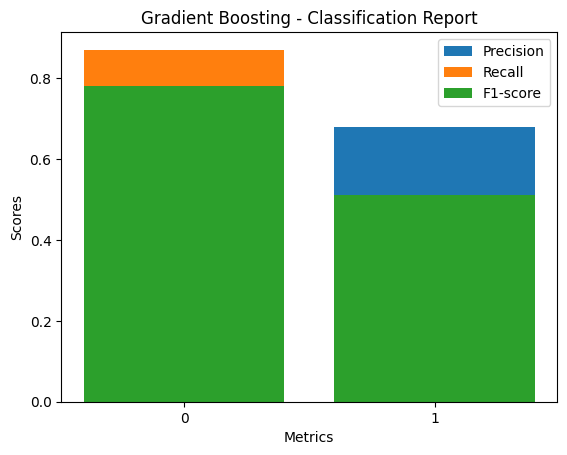

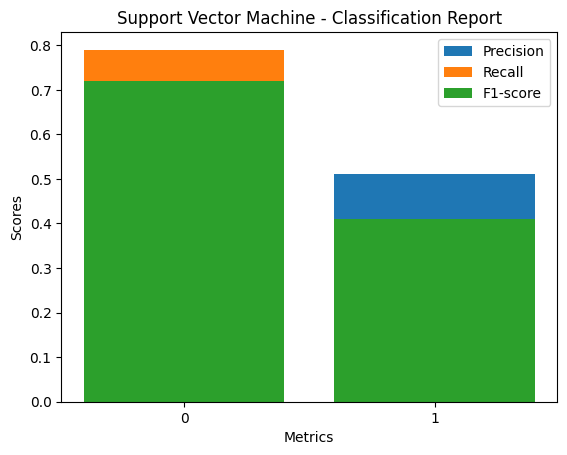

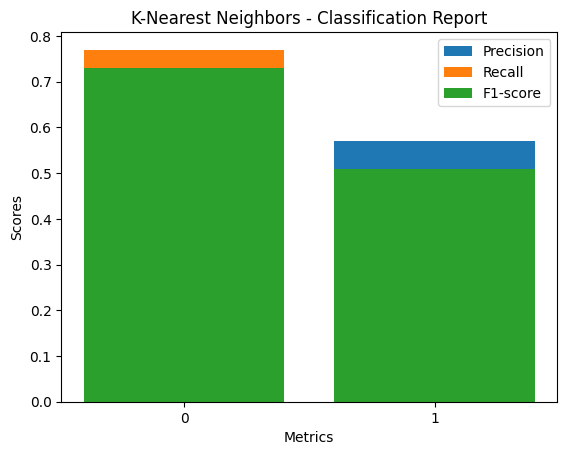

In [28]:
for name, result in results.items():
    cr = result['Classification Report']
    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure()
    plt.bar(classes, [x[0] for x in plotMat], label="Precision")
    plt.bar(classes, [x[1] for x in plotMat], label="Recall")
    plt.bar(classes, [x[2] for x in plotMat], label="F1-score")
    plt.title(f"{name} - Classification Report")
    plt.xlabel("Metrics")
    plt.ylabel("Scores")
    plt.legend()
    plt.show()

Estos predicen una clase (sobrevivió o no). Se usan la precisión, la matriz de confusión y el informe de clasificación (precision, recall, F1-score).

    Observación: Se debería identificar el modelo con la precisión más alta. La matriz de confusión y el informe de clasificación dan información más detallada sobre los tipos de errores cometidos por el modelo.


In [30]:
best_model = max(results, key=lambda k: results[k]['Accuracy'])
print(f"El mejor modelo de clasificación es: {best_model} con una precisión de {results[best_model]['Accuracy']}")

El mejor modelo de clasificación es: Logistic Regression con una precisión de 0.6993006993006993


Modelos de Clustering

Carga de Datos

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler


In [35]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)


Preprocesa los datos:

In [36]:
data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data.dropna(inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


3. Aplicación de Algoritmos de Clustering

    Seleccion y aplica los algoritmos:

In [37]:
algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

results = {}
for name, algorithm in algorithms.items():
    clusters = algorithm.fit_predict(X_scaled)
    results[name] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4. Análisis de Resultados

    Crea un DataFrame con los resultados:

In [38]:
for name, clusters in results.items():
    data[name] = clusters

print(data.head())


   Pclass   Age  SibSp  Parch     Fare  KMeans  Agglomerative  DBSCAN
0       3  22.0      1      0   7.2500       1              2       0
1       1  38.0      1      0  71.2833       0              1       1
2       3  26.0      0      0   7.9250       1              2       2
3       1  35.0      1      0  53.1000       0              1       1
4       3  35.0      0      0   8.0500       1              2       2


Grafica los resultados:

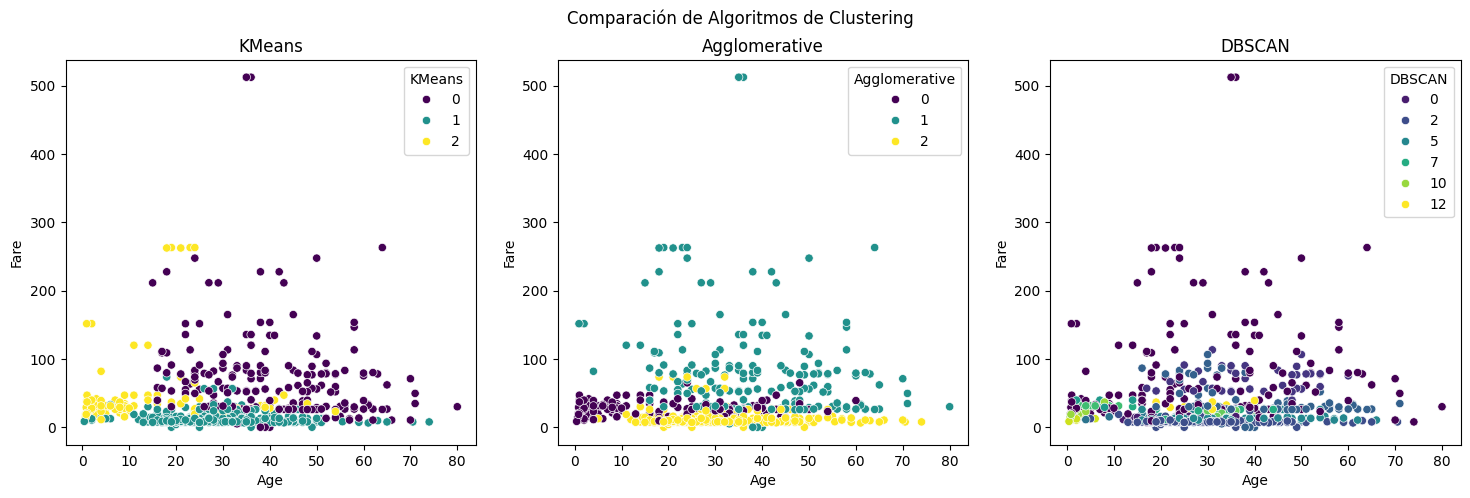

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación de Algoritmos de Clustering')

sns.scatterplot(ax=axes[0], x=data['Age'], y=data['Fare'], hue=data['KMeans'], palette='viridis')
axes[0].set_title('KMeans')

sns.scatterplot(ax=axes[1], x=data['Age'], y=data['Fare'], hue=data['Agglomerative'], palette='viridis')
axes[1].set_title('Agglomerative')

sns.scatterplot(ax=axes[2], x=data['Age'], y=data['Fare'], hue=data['DBSCAN'], palette='viridis')
axes[2].set_title('DBSCAN')

plt.show()


Estos modelos agrupan datos similares. No hay una métrica única para evaluarlos, la elección depende del problema. El notebook usa visualizaciones para comparar KMeans, Agglomerative Clustering y DBSCAN.

    Observación: Se debería analizar qué algoritmo de clustering produjo los grupos más interpretables y útiles según el contexto.


Red Neuronal

1 . Importa las bibliotecas:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


2. Carga y Preprocesamiento de Datos

    Carga el dataset del Titanic:

In [41]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)


Preprocesa los datos:

In [42]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data.dropna(inplace=True)
X = data.drop('Survived', axis=1)
y = data['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


3. Definición y Entrenamiento del Modelo

    Define la arquitectura de la red neuronal:

In [43]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenar el modelo:

In [44]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4378 - loss: 0.7189 - val_accuracy: 0.6923 - val_loss: 0.6317
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.6230 - val_accuracy: 0.6643 - val_loss: 0.5894
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.5654 - val_accuracy: 0.6783 - val_loss: 0.5840
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7205 - loss: 0.5793 - val_accuracy: 0.6853 - val_loss: 0.5799
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.5674 - val_accuracy: 0.6783 - val_loss: 0.5930
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.5557 - val_accuracy: 0.6783 - val_loss: 0.5937
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7519 - loss: 0.5443 - val_accuracy: 0.6783 - val_loss: 0.5908
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7720 - loss: 0.5094 - val_accuracy: 0.6783 - val_loss:

4. Evaluación del Modelo

    Evaluamos el modelo en el conjunto de prueba:

In [45]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.6713286713286714
Confusion Matrix:
[[74 13]
 [34 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        87
           1       0.63      0.39      0.48        56

    accuracy                           0.67       143
   macro avg       0.66      0.62      0.62       143
weighted avg       0.66      0.67      0.65       143



Graficamos la precisión y la pérdida durante el entrenamiento:

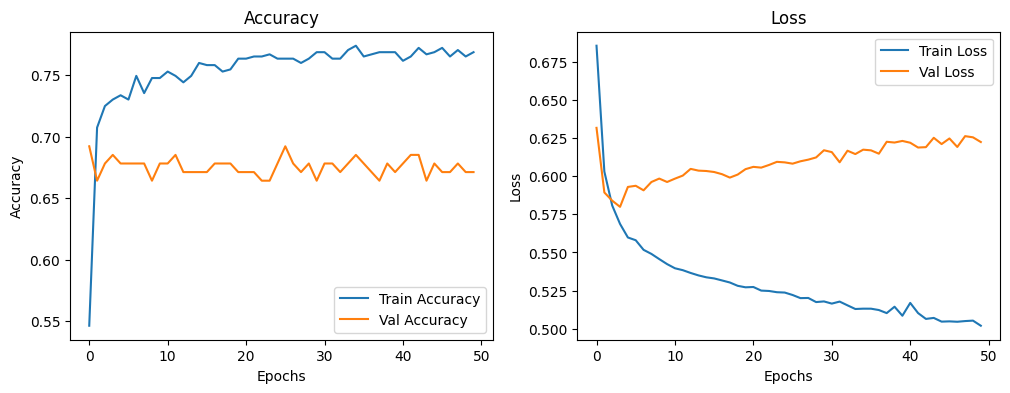

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Análisis:

    Preprocesamiento de datos: El notebook incluye pasos de preprocesamiento de datos como la eliminación de valores faltantes y la estandarización de características.
    Modelos de regresión: Se entrenan y evalúan seis modelos de regresión diferentes. Los resultados se presentan en un DataFrame y se visualizan utilizando gráficos de barras y líneas.
    Modelos de clasificación: Se entrenan y evalúan seis modelos de clasificación. Se calculan la precisión, la matriz de confusión y el informe de clasificación para cada modelo. Las matrices de confusión se visualizan utilizando mapas de calor.
    Clustering: Se aplican tres algoritmos de clustering (KMeans, Agglomerative Clustering y DBSCAN) a los datos. Los resultados del clustering se visualizan utilizando diagramas de dispersión.
    Red neuronal: Se construye y entrena una red neuronal simple para la clasificación. Se muestra la precisión del modelo, la matriz de confusión, el informe de clasificación y los gráficos de precisión y pérdida

Análisis General:

    Comparación entre tipos de modelos: Es difícil comparar directamente modelos de regresión, clasificación y clustering.
    Visualizaciones: Las gráficas son útiles para comparar el rendimiento de los modelos dentro de cada categoría.
    Profundización en el análisis: Se podría mejorar el análisis identificando los mejores modelos de cada categoría, explicando las diferencias en su rendimiento y relacionando los resultados con el problema del Titanic.


Conclusiones:

    El notebook demuestra una buena comprensión de diferentes técnicas de aprendizaje automático.
    Se utilizan varias métricas de evaluación para comparar el rendimiento del modelo.
    Las visualizaciones ayudan a comprender los resultados y a obtener información sobre los datos.
    El notebook podría mejorarse aún más incluyendo una sección de selección de modelos y optimización de hiperparámetros.

En general, el notebook es un buen ejemplo de cómo utilizar diferentes modelos de aprendizaje automático para analizar un conjunto de datos.


Es cierto que un conjunto de datos pequeño puede afectar el rendimiento de los modelos de Machine Learning, pero hay que analizar varios factores para entender la situación en este caso:

1. Tamaño del conjunto de datos del Titanic:

    El conjunto de datos del Titanic no es extremadamente pequeño, pero tampoco es masivo. Tiene alrededor de 891 registros completos.
    Para algunos modelos, este tamaño puede ser suficiente, especialmente si las características son informativas.
    Para modelos más complejos (como redes neuronales profundas), un conjunto de datos más grande podría ser beneficioso.

2. Resultados obtenidos:

    Es importante revisar las métricas obtenidas en el notebook. ¿Qué tan bajos fueron los resultados? ¿Hay una gran diferencia entre los resultados de entrenamiento y prueba (posible overfitting)?
    Comparar con benchmarks: Buscar resultados de otros modelos entrenados con el dataset del Titanic para tener una referencia.

3. Posibles causas de resultados no óptimos (además del tamaño del dataset):

    Características: Las características seleccionadas ("Pclass", "Age", "SibSp", "Parch", "Fare") pueden no ser suficientes para capturar toda la complejidad del problema. Se podrían explorar otras características o realizar ingeniería de características.
    Preprocesamiento de datos: La eliminación de valores faltantes (dropna) puede reducir el tamaño del conjunto de datos y sesgar los resultados. Explorar técnicas de imputación.
    Selección de modelos e hiperparámetros: Es posible que los modelos o hiperparámetros elegidos no sean los más adecuados para este problema. Realizar una búsqueda de hiperparámetros y probar diferentes modelos.

4. Alternativas para mejorar el rendimiento con un conjunto de datos pequeño:

    Técnicas de aumento de datos: Generar datos sintéticos a partir de los existentes.
    Transfer learning: Usar un modelo pre-entrenado con un conjunto de datos más grande y adaptarlo al problema del Titanic.
    Modelos más simples: Modelos con menos parámetros (regresión lineal, árboles de decisión) pueden ser menos propensos al overfitting con datasets pequeños.

En resumen: Si bien el tamaño del conjunto de datos puede ser un factor, es importante analizar otros aspectos del proceso de modelado para determinar las causas de los resultados no óptimos y explorar